In [13]:
from wordcloud import WordCloud,STOPWORDS
#create stop words 
stopwords = set(STOPWORDS)
#call the wordcloud Constructor 
WC = WordCloud(stopwords=stopwords,max_words=25,background_color="white").generate('As you all know, You can never process text directly in Machine Learning . In order to achieve that You need to convert them into some vector. Word Embedding is just a technique to convert text into numeric form. There could be different techniques. This article will brief you on –  Word Embedding in Python through various ApproachesThis is one of the simplest technique in a word embedding. Here the complete vocabulary is converted into tokens .')

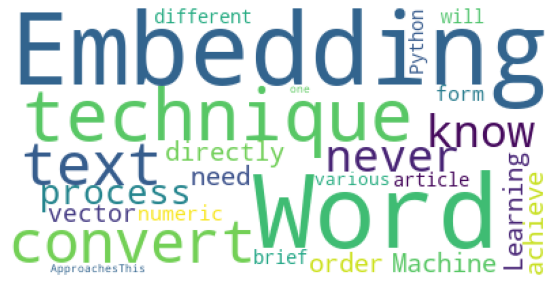

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,5)
plt.imshow(WC)
plt.axis("off")
# plt.show()
plt.savefig('test.png')